In [1]:
import pandas as pd
import transformers
import ckip_transformers

c:\Users\CHARLIE\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from ckip_transformers.nlp import CkipWordSegmenter
from ckip_transformers.nlp import CkipPosTagger
from ckip_transformers.nlp import CkipNerChunker

#斷詞、詞性標註、實體辨識模型

In [3]:
#載入CKIP模型，device=0表示使用GPU；device=-1表示使用CPU

print('Initializing drivers ... WS')
CKIP_WS = CkipWordSegmenter(model="bert-base", device=-1)
print('Initializing drivers ... POS')
CKIP_POS = CkipPosTagger(model="bert-base", device=-1)
print('Initializing drivers ... NER')
CKIP_NER = CkipNerChunker(model="bert-base", device=-1)

Initializing drivers ... WS
Initializing drivers ... POS
Initializing drivers ... NER


#匯入範例檔案(PTT八卦版)

In [4]:
df = pd.read_csv('C:/Users/CHARLIE/Desktop/TextMining/CKIP斷詞/ptt_gossiping_16533.csv', index_col=0)
df

,title
0,[問卦] 機車如何騎中線
1,Re: [新聞] 今年來新生兒僅9萬人 人口連八月「生不如
2,[問卦] 地震這麼嚴重沒放假，4不4要下架領導人?
3,[問卦] 一般RC結構大概多耐震?
4,[問卦] 認真問 機車不要買二手 對還錯
...,...
16528,[問卦] 高雄圓環設置停車場是什麼智障設計？
16529,[問卦] 第一次喝茶的魔手有多震撼
16530,[問卦] 幼稚園兒童吃飯收大人的錢
16531,[問卦] 第一次離職有多震撼


In [5]:
text_list = []
for i in df['title']:
    text_list.append(i)

**斷詞(WS)**

In [6]:
# 輸入必須是list of sentences
C_sents_annotated_ws = CKIP_WS(text_list)

Inference: 100%|██████████| 65/65 [20:20<00:00, 18.77s/it]


**詞性標記(POS)**

In [7]:
# 輸入必須是list of list of words
C_sents_annotated_pos = CKIP_POS(C_sents_annotated_ws)

Inference: 100%|██████████| 86/86 [17:16<00:00, 12.05s/it]


In [ ]:
print('sents_annotated_pos ->')
print(list(zip(C_sents_annotated_ws[0], C_sents_annotated_pos[0])))

In [21]:
#根據詞性篩選字詞
def filter_by_pos(sent, pos_filter):
    filter_pos_sent = []
    for j,(word,pos) in enumerate(zip(sent[0], sent[1])):
        if pos[0] in pos_filter:
            filter_pos_sent.append(word)
    return filter_pos_sent

**例1:摘選出詞性(POS)是「N開頭」**

In [28]:
pos_filter_n = ['N']
#合併斷詞和詞性
C_sents_annotated_ws_pos = zip(C_sents_annotated_ws, C_sents_annotated_pos)
#根據特定詞性篩選
C_sents_filter_pos_n = [filter_by_pos(sent, pos_filter_n) for sent in C_sents_annotated_ws_pos]

**例2:摘選出詞性(POS)是「V開頭」**

In [29]:
pos_filter_v = ['V']
C_sents_annotated_ws_pos = zip(C_sents_annotated_ws, C_sents_annotated_pos)
C_sents_filter_pos_v = [filter_by_pos(sent, pos_filter_v) for sent in C_sents_annotated_ws_pos]

**命名實體辨識 (NER)**

In [31]:
C_sents_annotated_ner = CKIP_NER(text_list)

Inference: 100%|██████████| 65/65 [12:06<00:00, 11.17s/it]


In [32]:
def filter_by_ner(sent, ner_filter):
    filter_ner_sent = []
    for j,word in enumerate(sent): 
        if word.ner in ner_filter:
            filter_ner_sent.append(word.word)
    return filter_ner_sent

**例3:摘選出命名實體(NE)是「PERSON」**

In [39]:
ner_filter = ['PERSON']
C_sents_filter_ner_p = [filter_by_ner(sent, ner_filter) for sent in C_sents_annotated_ner]

**例4:摘選出命名實體(NE)是「PERSON、GPE」**

In [40]:
ner_filter_PG = ['PERSON', 'GPE']
C_sents_filter_ner_pg = [filter_by_ner(sent, ner_filter_PG) for sent in C_sents_annotated_ner]

In [ ]:
#例1
pos_n = []
for i in C_sents_filter_pos_n:
    for x in i:
        pos_n.append(x)
pos_n

In [ ]:
#例2
pos_v = []
for i in C_sents_filter_pos_v:
    for x in i:
        pos_v.append(x)
pos_v

In [ ]:
#例3
ner_p = []
for i in C_sents_filter_ner_p:
    for x in i:
        if len(x) > 0:
            ner_p.append(x)
        else:
            pass
ner_p

In [ ]:
#例4
ner_pg = []
for i in C_sents_filter_ner_pg:
    for x in i:
        if len(x) > 0:
            ner_pg.append(x)
        else:
            pass
ner_pg

#繪製文字雲

In [57]:
from collections import Counter
import wordcloud

In [81]:
#POS, NER
dictionary = Counter(ner_pg)

In [82]:
wc = wordcloud.WordCloud(background_color='white',
                         margin=2, # 文字間距
                         font_path='C:/Users/CHARLIE/Desktop/文字探勘/NotoSansTC-Black.otf', # 字體
                         max_words=200, # 取多少文字
                         width=1500, height=800) # 解析度

wc.generate_from_frequencies(dictionary)

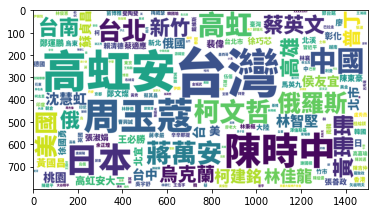

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(wc)

In [84]:
#匯出文字雲圖
wc.to_file('C:/Users/CHARLIE/Desktop/文字探勘/第四題.png')